### Sigmoid Function
The Sigmoid activation function maps any real-valued input into the range (0, 1).  
It is defined as:
\[
\sigma(x) = \frac{1}{1 + e^{-x}}
\]
Its derivative is:
\[
\sigma'(x) = \sigma(x)(1 - \sigma(x))
\]
Sigmoid is widely used in binary classification problems.


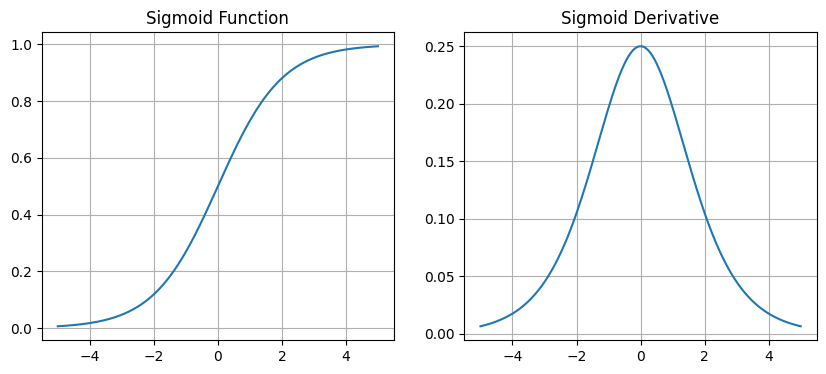

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    s = sigmoid(x)
    return s * (1 - s)

x = np.linspace(-5, 5, 200)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid Function")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, sigmoid_grad(x))
plt.title("Sigmoid Derivative")
plt.grid()
plt.show()


### Tanh Function
The hyperbolic tangent maps inputs into (-1, 1) and is zero-centered.  
\[
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
\]
Derivative:
\[
\tanh'(x) = 1 - \tanh^2(x)
\]


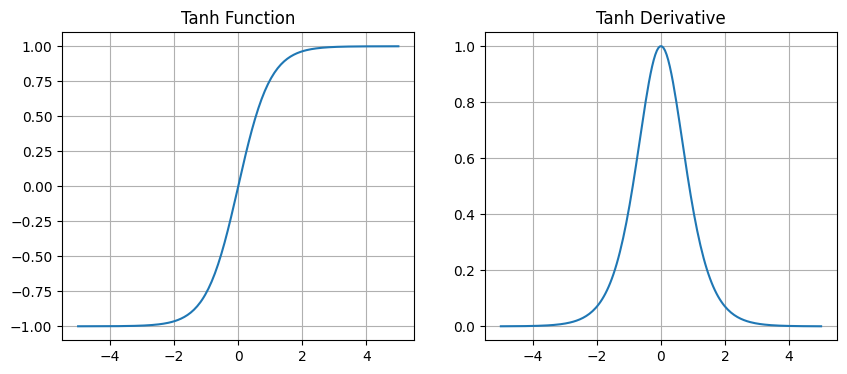

In [3]:
def tanh(x):
    return np.tanh(x)

def tanh_grad(x):
    return 1 - np.tanh(x)**2

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, tanh(x))
plt.title("Tanh Function")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, tanh_grad(x))
plt.title("Tanh Derivative")
plt.grid()
plt.show()


### Parametric Leaky Tanh (PLTanh)
This function modifies Tanh by adding a small slope on both sides for flexibility:
\[
f(x) =
\begin{cases}
a \cdot \tanh(x), & x \ge 0 \\
b \cdot \tanh(x), & x < 0
\end{cases}
\]
Derivative:
\[
f'(x) =
\begin{cases}
a \cdot (1 - \tanh^2(x)), & x \ge 0 \\
b \cdot (1 - \tanh^2(x)), & x < 0
\end{cases}
\]


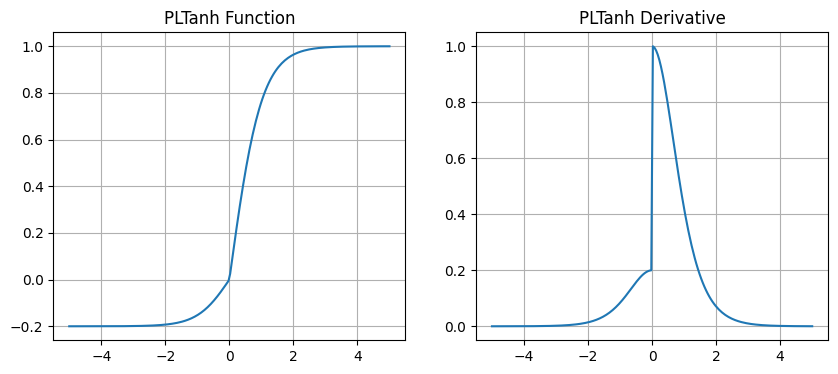

In [4]:
def pltanh(x, a=1.0, b=0.2):
    return np.where(x >= 0, a * np.tanh(x), b * np.tanh(x))

def pltanh_grad(x, a=1.0, b=0.2):
    return np.where(x >= 0, a * (1 - np.tanh(x)**2), b * (1 - np.tanh(x)**2))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, pltanh(x))
plt.title("PLTanh Function")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, pltanh_grad(x))
plt.title("PLTanh Derivative")
plt.grid()
plt.show()


### Softmax Function
Softmax converts a vector of real numbers into a probability distribution that sums to 1.  
It is mainly used for multi-class classification.

\[
\text{Softmax}(x_i) = \frac{e^{x_i}}{\sum_j e^{x_j}}
\]

Derivative (for a single input vector):
\[
\frac{\partial y_i}{\partial x_j} =
\begin{cases}
y_i(1 - y_i), & i = j \\
- y_i y_j, & i \ne j
\end{cases}
\]


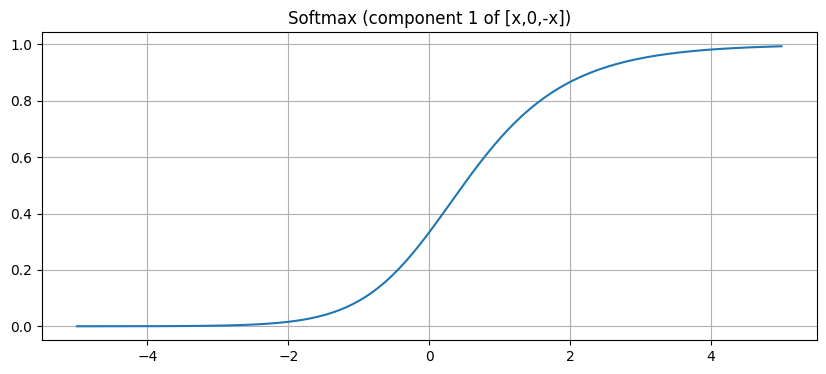

In [5]:
def softmax(x):
    e = np.exp(x - np.max(x))
    return e / np.sum(e)

# For visualization, use 1D version
x = np.linspace(-5, 5, 200)
y = np.array([softmax(np.array([v, 0, -v]))[0] for v in x])

plt.figure(figsize=(10,4))
plt.plot(x, y)
plt.title("Softmax (component 1 of [x,0,-x])")
plt.grid()
plt.show()


### ReLU Function
The ReLU function outputs the input directly if it’s positive, otherwise 0.

\[
f(x) = \max(0, x)
\]
Derivative:
\[
f'(x) =
\begin{cases}
1, & x > 0 \\
0, & x \le 0
\end{cases}
\]


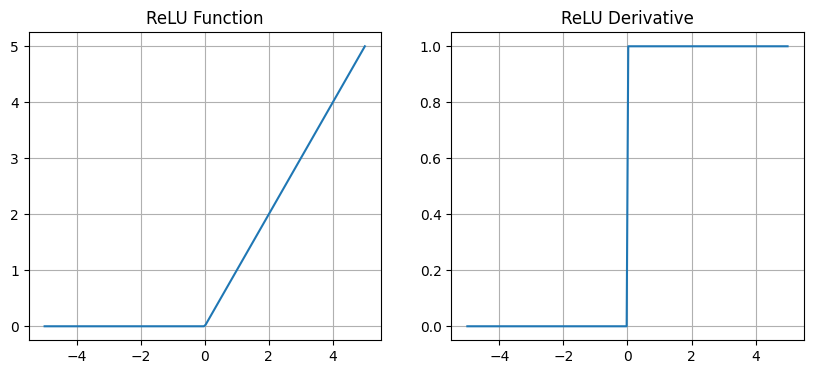

In [6]:
def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return np.where(x > 0, 1, 0)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, relu(x))
plt.title("ReLU Function")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, relu_grad(x))
plt.title("ReLU Derivative")
plt.grid()
plt.show()


### Leaky ReLU Function
Leaky ReLU fixes the "dying ReLU" problem by allowing a small slope in the negative region.

\[
f(x) =
\begin{cases}
x, & x \ge 0 \\
\alpha x, & x < 0
\end{cases}
\]
Derivative:
\[
f'(x) =
\begin{cases}
1, & x \ge 0 \\
\alpha, & x < 0
\end{cases}
\]


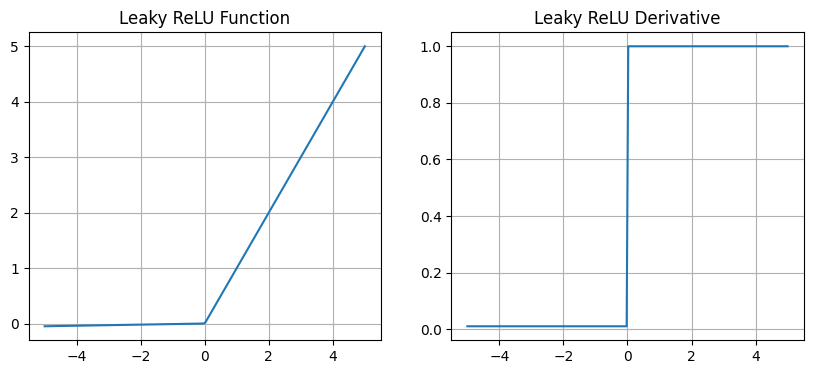

In [7]:
def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

def leaky_relu_grad(x, alpha=0.01):
    return np.where(x >= 0, 1, alpha)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, leaky_relu(x))
plt.title("Leaky ReLU Function")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, leaky_relu_grad(x))
plt.title("Leaky ReLU Derivative")
plt.grid()
plt.show()


### Parametric ReLU (PReLU)
Similar to Leaky ReLU, but the negative slope is a learnable parameter.

\[
f(x) =
\begin{cases}
x, & x \ge 0 \\
a x, & x < 0
\end{cases}
\]
Derivative:
\[
f'(x) =
\begin{cases}
1, & x \ge 0 \\
a, & x < 0
\end{cases}
\]


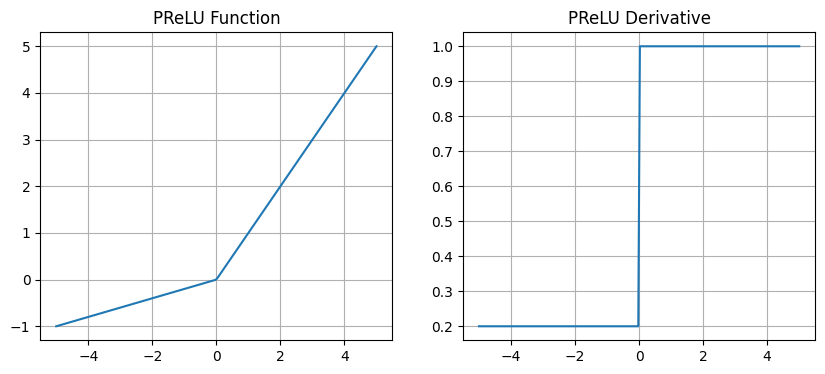

In [8]:
def prelu(x, a=0.2):
    return np.where(x >= 0, x, a * x)

def prelu_grad(x, a=0.2):
    return np.where(x >= 0, 1, a)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, prelu(x))
plt.title("PReLU Function")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, prelu_grad(x))
plt.title("PReLU Derivative")
plt.grid()
plt.show()


### Exponential Linear Unit (ELU)
ELU smooths out the negative region using an exponential curve.

\[
f(x) =
\begin{cases}
x, & x \ge 0 \\
\alpha (e^x - 1), & x < 0
\end{cases}
\]
Derivative:
\[
f'(x) =
\begin{cases}
1, & x \ge 0 \\
f(x) + \alpha, & x < 0
\end{cases}
\]


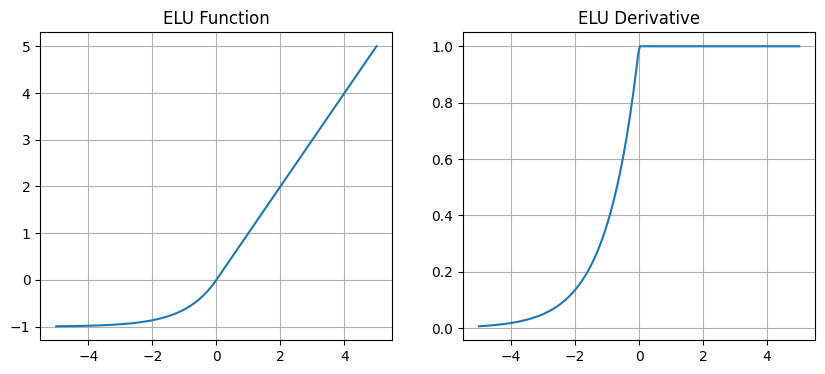

In [9]:
def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def elu_grad(x, alpha=1.0):
    return np.where(x >= 0, 1, elu(x, alpha) + alpha)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, elu(x))
plt.title("ELU Function")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, elu_grad(x))
plt.title("ELU Derivative")
plt.grid()
plt.show()


### Trivialized Exponential Linear Unit (TeLU)
A simplified version of ELU where negative outputs are replaced by \( e^x - 1 \).

\[
f(x) =
\begin{cases}
x, & x \ge 0 \\
e^x - 1, & x < 0
\end{cases}
\]
Derivative:
\[
f'(x) =
\begin{cases}
1, & x \ge 0 \\
e^x, & x < 0
\end{cases}
\]


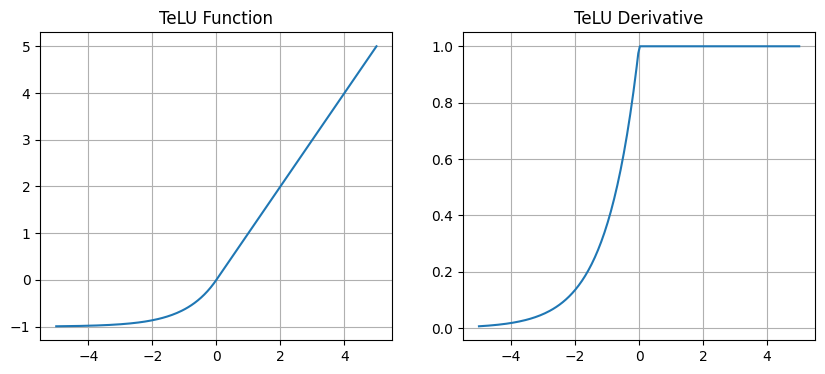

In [10]:
def telu(x):
    return np.where(x >= 0, x, np.exp(x) - 1)

def telu_grad(x):
    return np.where(x >= 0, 1, np.exp(x))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, telu(x))
plt.title("TeLU Function")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, telu_grad(x))
plt.title("TeLU Derivative")
plt.grid()
plt.show()


### Scaled Exponential Linear Unit (SeLU)
SELU is a self-normalizing activation function used in deep networks.

\[
f(x) =
\lambda \begin{cases}
x, & x \ge 0 \\
\alpha e^x - \alpha, & x < 0
\end{cases}
\]
Default constants: \(\lambda = 1.0507, \alpha = 1.67326\)


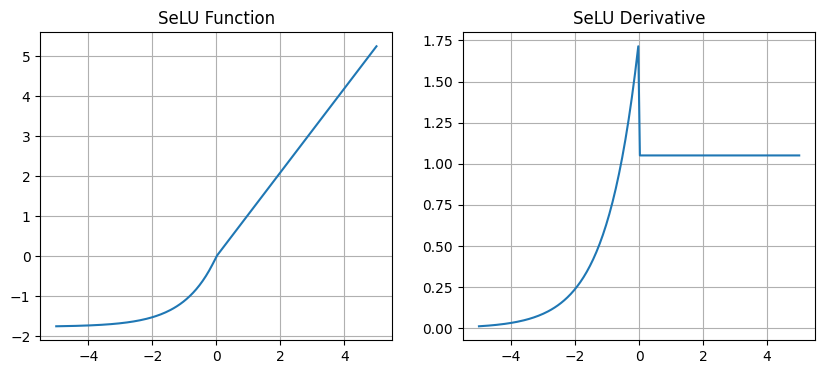

In [11]:
def selu(x, alpha=1.67326, lambd=1.0507):
    return lambd * np.where(x >= 0, x, alpha * np.exp(x) - alpha)

def selu_grad(x, alpha=1.67326, lambd=1.0507):
    return lambd * np.where(x >= 0, 1, alpha * np.exp(x))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, selu(x))
plt.title("SeLU Function")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, selu_grad(x))
plt.title("SeLU Derivative")
plt.grid()
plt.show()


### Maxout Function
Maxout selects the maximum output among multiple linear functions:
\[
f(x) = \max(w_1 x + b_1, w_2 x + b_2)
\]
This function can approximate any convex function.


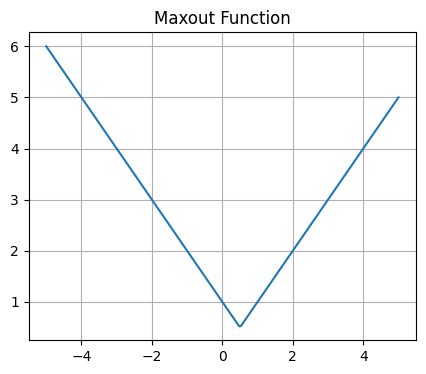

In [12]:
def maxout(x, w1=1, b1=0, w2=-1, b2=1):
    return np.maximum(w1*x + b1, w2*x + b2)

plt.figure(figsize=(5,4))
plt.plot(x, maxout(x))
plt.title("Maxout Function")
plt.grid()
plt.show()


### GELU Function
The GELU activation smoothly blends linear and nonlinear behaviors.

\[
f(x) = x \Phi(x)
\]
where \(\Phi(x)\) is the standard normal CDF.  
Approximation:
\[
f(x) = 0.5x(1 + \tanh[\sqrt{2/\pi}(x + 0.044715x^3)])
\]


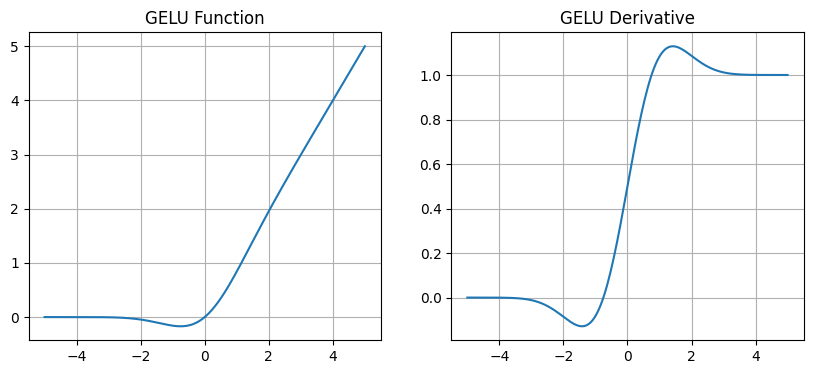

In [13]:
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))

def gelu_grad(x):
    tanh_term = np.tanh(np.sqrt(2/np.pi)*(x + 0.044715*x**3))
    return 0.5*(1 + tanh_term) + 0.5*x*(1 - tanh_term**2)*(np.sqrt(2/np.pi)*(1 + 3*0.044715*x**2))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, gelu(x))
plt.title("GELU Function")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, gelu_grad(x))
plt.title("GELU Derivative")
plt.grid()
plt.show()


### Swish Function
Proposed by Google, Swish is defined as:
\[
f(x) = x \cdot \sigma(x)
\]
Derivative:
\[
f'(x) = \sigma(x) + x\sigma'(x)
\]


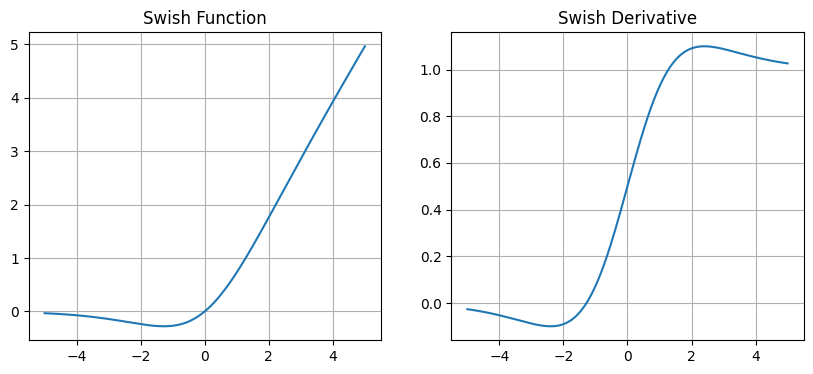

In [14]:
def swish(x):
    return x * sigmoid(x)

def swish_grad(x):
    s = sigmoid(x)
    return s + x * s * (1 - s)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, swish(x))
plt.title("Swish Function")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, swish_grad(x))
plt.title("Swish Derivative")
plt.grid()
plt.show()


### Mish Function
Mish is a smooth, self-regularized non-monotonic activation function.

\[
f(x) = x \cdot \tanh(\ln(1 + e^x))
\]
Derivative is complex, usually computed numerically.


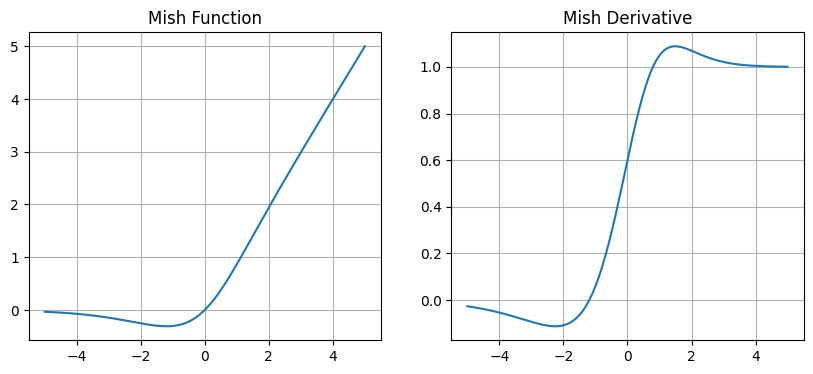

In [15]:
def mish(x):
    return x * np.tanh(np.log1p(np.exp(x)))

def mish_grad(x):
    sp = sigmoid(x)
    tanh_sp = np.tanh(np.log1p(np.exp(x)))
    return tanh_sp + x * sp * (1 - tanh_sp**2)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, mish(x))
plt.title("Mish Function")
plt.grid()

plt.subplot(1,2,2)
plt.plot(x, mish_grad(x))
plt.title("Mish Derivative")
plt.grid()
plt.show()


### Which activation functions fit which classification tasks?

**Binary Classification:**
- Sigmoid → maps outputs to (0,1), interpretable as probability of one class.
- Tanh → zero-centered; useful for binary with balanced outputs.
- ReLU, Leaky ReLU, PReLU, ELU, SeLU, Swish, Mish → often used in hidden layers of binary classifiers.

**Multi-Class Classification:**
- Softmax → normalizes output vector into probabilities across multiple classes.
- In hidden layers, non-linear activations (ReLU, GELU, Swish, Mish) are also used before Softmax.

**Summary:**
- Output layer: Sigmoid → binary, Softmax → multi-class  
- Hidden layers: ReLU-family, GELU, Swish, Mish are modern choices due to better gradient flow.
